In [1]:
from core.preprocessing import make_small_train, make_small_dev, retrend_data
from core.arima_models import SumToSumARIMA
from core.utilities import plot_forecasts, calc_test_mse
import numpy as np
import pandas as pd
df = pd.read_pickle('data/detrended_master_dataset.pkl').fillna(0)
clearsky_df = pd.read_pickle('data/clearsky_master_dataset.pkl').fillna(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', context='talk')
from time import time

/Users/bennetmeyers/.virtualenvs/sc/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train_df = make_small_train(df, 'combined')
test_df = make_small_dev(df)
test_clearsky = make_small_dev(clearsky_df)

In [3]:
prob = SumToSumARIMA(train_df)

In [4]:
ti = time()
prob.train(order=(1,1,0))
tf = time()
print('training took {:1f} seconds'.format(tf - ti))

training took 1.529003 seconds


In [5]:
ti = time()
prob.test(test_df['total_power'])
tf = time()
print('testing took {:1f} seconds'.format(tf - ti))

testing took 2.696087 seconds


(24815548.75, 24821366.25)

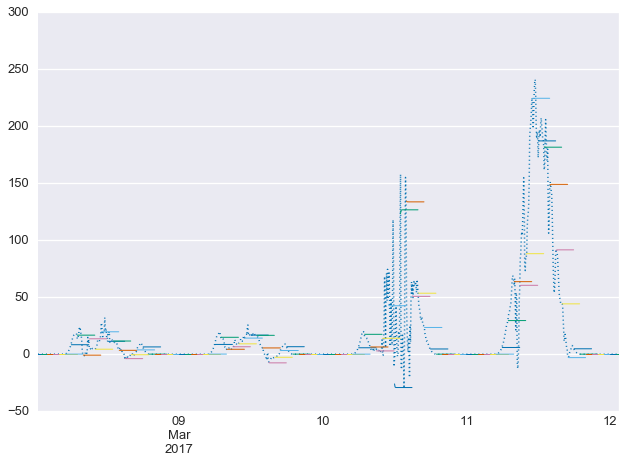

In [6]:
prob.plot_test()
ax = plt.gca()
lim = ax.get_xlim()
chunk = (lim[1] - lim[0])/8.
start = lim[0] + 2*chunk
end = lim[0] + 6*chunk
ax.set_xlim(start, end)

Transform back to Power from devation from clear sky.

In [7]:
forecasts = prob.forecasts

In [8]:
transformed_forecasts = [retrend_data(f) for f in forecasts]

In [12]:
original_df = pd.read_pickle('data/master_dataset.pkl').fillna(0)
original_test = make_small_dev(original_df)

(24815548.75, 24821366.25)

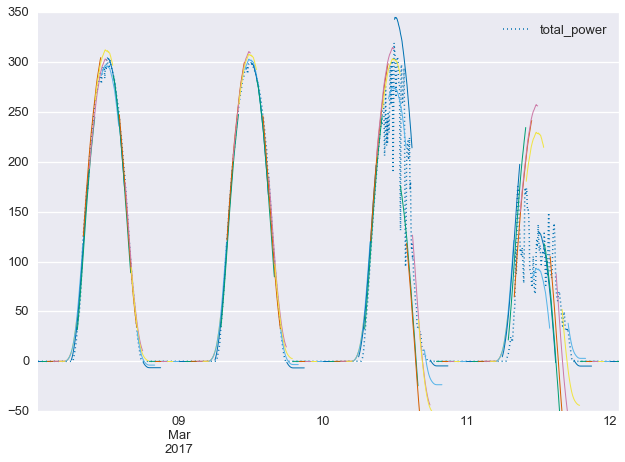

In [13]:
plot_forecasts(original_test, transformed_forecasts)
ax = plt.gca()
lim = ax.get_xlim()
chunk = (lim[1] - lim[0])/8.
start = lim[0] + 2*chunk
end = lim[0] + 6*chunk
ax.set_ylim(-50, 350)
ax.set_xlim(start, end)

In [14]:
calc_test_mse(original_test, transformed_forecasts)

1619.3228048596081

In [ ]:
calc_test_mse((test_clearsky['total_power'] - test_df['total_power']).dropna(), transformed_forecasts)

In [ ]:
plt.plot